In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_table(r'C:\Users\Lenovo\Documents\Verzeo\Restaurant_Reviews.tsv', sep='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df['Liked'].unique()

array([1, 0], dtype=int64)

In [7]:
df['Liked'].nunique()

2

In [8]:
df['Liked'].value_counts()

0    500
1    500
Name: Liked, dtype: int64

<AxesSubplot:>

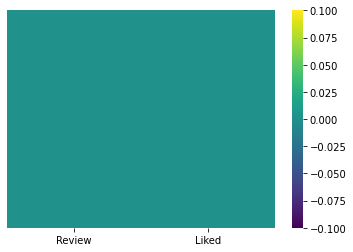

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [11]:
df.shape

(1000, 2)

EDA - Exploratory Data Analysis

<AxesSubplot:>

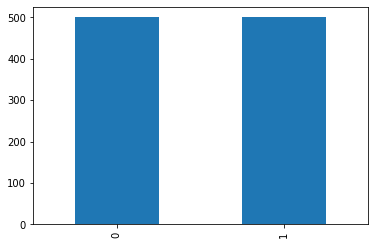

In [12]:
df['Liked'].value_counts().plot(kind='bar')

In [17]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [18]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [19]:
df['Review'] = df['Review'].apply(lambda x: remove_punctuation(x))
df['Review'].head()

0                                 Wow Loved this place
1                                    Crust is not good
2             Not tasty and the texture was just nasty
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [20]:
tokenizer = RegexpTokenizer(r'\w+')
df['Review'] = df['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Review'].head()

0                            [wow, loved, this, place]
1                               [crust, is, not, good]
2    [not, tasty, and, the, texture, was, just, nasty]
3    [stopped, by, during, the, late, may, bank, ho...
4    [the, selection, on, the, menu, was, great, an...
Name: Review, dtype: object

In [21]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [22]:
df['Review'].apply(lambda x: word_lemmatizer(x))
df['Review'].head()

0                            [wow, loved, this, place]
1                               [crust, is, not, good]
2    [not, tasty, and, the, texture, was, just, nasty]
3    [stopped, by, during, the, late, may, bank, ho...
4    [the, selection, on, the, menu, was, great, an...
Name: Review, dtype: object

In [23]:
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [24]:
df['Review'] = df['Review'].apply(lambda x: word_stemmer(x))
df['Review']

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think wel...
999    then as if i hadnt wast enough of my life ther...
Name: Review, Length: 1000, dtype: object

In [53]:
X = df['Review']
y = df['Liked']

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [60]:
from sklearn.svm import SVC
model1 = SVC()
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [62]:
X_train.shape

(700,)

In [63]:
y_train.shape

(700,)

In [64]:
X_test.shape

(300,)

In [65]:
y_test.shape

(300,)

In [66]:
X_train_vect = count_vectorizer.fit_transform(X_train).toarray()

In [67]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
X_test_vect = count_vectorizer.transform(X_test).toarray()

In [69]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
model1.fit(X_train_vect,y_train)

SVC()

In [71]:
y_pred1 = model1.predict(X_test_vect)

In [72]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy Score is:",accuracy_score(y_pred1,y_test))
print('\n')
print("Classification Report:",classification_report(y_pred1,y_test))
print('\n')
print('Confusion Matrix:',confusion_matrix(y_pred1,y_test))

Accuracy Score is: 0.77


Classification Report:               precision    recall  f1-score   support

           0       0.79      0.76      0.78       157
           1       0.75      0.78      0.76       143

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



Confusion Matrix: [[119  38]
 [ 31 112]]


PIPELINE USING COUNTVECTORIZER AND SVC

In [74]:
my_pipeline = Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                             ('Model', SVC())])

In [75]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('Countvectorizer', CountVectorizer()), ('Model', SVC())])

In [76]:
y_pred2 = my_pipeline.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy Score is:",accuracy_score(y_pred2,y_test))
print('\n')
print("Classification Report:",classification_report(y_pred2,y_test))
print('\n')
print('Confusion Matrix:',confusion_matrix(y_pred2,y_test))

Accuracy Score is: 0.79


Classification Report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79       149
           1       0.79      0.79      0.79       151

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



Confusion Matrix: [[118  31]
 [ 32 119]]


In [ ]:
Accuracy of SVC model without using pipeline : 77
Accuracy of SVC model using pipeline         : 79  

In [79]:
model2.fit(X_train_vect,y_train)

MultinomialNB()

In [80]:
y_pred3 = model2.predict(X_test_vect)

In [81]:
y_pred3

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], d

In [82]:
print("Classification_report is:",classification_report(y_pred3,y_test))
print('\n')
print("Confusion Matrix is:",confusion_matrix(y_pred3,y_test))
print('\n')
print("Accuracy score is:",accuracy_score(y_pred3,y_test))

Classification_report is:               precision    recall  f1-score   support

           0       0.67      0.83      0.74       122
           1       0.86      0.72      0.79       178

    accuracy                           0.77       300
   macro avg       0.77      0.78      0.76       300
weighted avg       0.78      0.77      0.77       300



Confusion Matrix is: [[101  21]
 [ 49 129]]


Accuracy score is: 0.7666666666666667


In [83]:
my_pipeline2 = Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                              ('Model', MultinomialNB())])

In [84]:
my_pipeline2.fit(X_train,y_train)

Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                ('Model', MultinomialNB())])

In [85]:
y_pred4 = my_pipeline2.predict(X_test)

In [86]:
y_pred4

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], d

In [87]:
print("Classification_report is:",classification_report(y_pred4,y_test))
print('\n')
print("Confusion Matrix is:",confusion_matrix(y_pred4,y_test))
print('\n')
print("Accuracy score is:",accuracy_score(y_pred4,y_test))

Classification_report is:               precision    recall  f1-score   support

           0       0.77      0.83      0.80       138
           1       0.85      0.78      0.81       162

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Confusion Matrix is: [[115  23]
 [ 35 127]]


Accuracy score is: 0.8066666666666666


In [ ]:
Accuracy in direct method   : 76
Accuracy in pipeline method : 80

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [149]:
my_pipeline3 = Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                              ('Model', LogisticRegression())])

In [150]:
my_pipeline3.fit(X_train,y_train)

Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                ('Model', LogisticRegression(max_iter=3000))])

In [151]:
y_pred5 = my_pipeline3.predict(X_test)

In [152]:
print("Classification_report is:",classification_report(y_pred5,y_test))
print('\n')
print("Confusion Matrix is:",confusion_matrix(y_pred5,y_test))
print('\n')
print("Accuracy score is:",accuracy_score(y_pred5,y_test))

Classification_report is:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       140
           1       0.85      0.79      0.82       160

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



Confusion Matrix is: [[117  23]
 [ 33 127]]


Accuracy score is: 0.8133333333333334


In [93]:
my_pipeline4 = Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                              ('Model', RandomForestClassifier())])

In [94]:
my_pipeline4.fit(X_train,y_train)

Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                ('Model', RandomForestClassifier())])

In [95]:
y_pred6 = my_pipeline4.predict(X_test)

In [96]:
print("Classification_report is:",classification_report(y_pred6,y_test))
print('\n')
print("Confusion Matrix is:",confusion_matrix(y_pred6,y_test))
print('\n')
print("Accuracy score is:",accuracy_score(y_pred6,y_test))

Classification_report is:               precision    recall  f1-score   support

           0       0.75      0.82      0.78       138
           1       0.83      0.77      0.80       162

    accuracy                           0.79       300
   macro avg       0.79      0.80      0.79       300
weighted avg       0.80      0.79      0.79       300



Confusion Matrix is: [[113  25]
 [ 37 125]]


Accuracy score is: 0.7933333333333333


In [137]:
my_pipeline5 = Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                              ('Model', XGBClassifier(learning_rate=0.1, n_estimators=100))])

In [138]:
my_pipeline5.fit(X_train,y_train)

c:\users\lenovo\desktop\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Countvectorizer', CountVectorizer()),
                ('Model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=2, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [139]:
y_pred7 = my_pipeline5.predict(X_test)

In [140]:
print("Classification_report is:",classification_report(y_pred7,y_test))
print('\n')
print("Confusion Matrix is:",confusion_matrix(y_pred7,y_test))
print('\n')
print("Accuracy score is:",accuracy_score(y_pred7,y_test))

Classification_report is:               precision    recall  f1-score   support

           0       0.75      0.75      0.75       149
           1       0.75      0.75      0.75       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



Confusion Matrix is: [[112  37]
 [ 38 113]]


Accuracy score is: 0.75


In [ ]:
Finally Logistic Regression is performing well from the above algorithms with 81.33% accuracy
To select from the Listed Four algorithms Multinomial with pipeline method notched up with 80% accuracy

In [ ]:
So I take Logistic regression to further proceed with streamlit app 

In [153]:
import joblib

In [154]:
joblib.dump(my_pipeline3,'Best_model')

['Best_model']

In [155]:
test = joblib.load('Best_model')

In [156]:
test.predict(["I like this food"])

array([1], dtype=int64)

In [157]:
test.predict(["hate their service"])

array([0], dtype=int64)